# CC5215: Privacidad de Datos

## Laboratorio 6

Integrantes:

- Diego Espinoza 

PD: (trabajé solo, porque debido a que trabajo fuera de la u, no pude ir a clases y ver a mi compañero de siempre, que por lo demás está haciendo su tesis y tampoco parece ser que ha ido a las ultimas clases).

In [2]:
# Load the data and libraries
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://users.dcc.uchile.cl/~mtoro/cursos/cc5215/adult_with_pii.csv')

## Question 1 (6 points)

- Implement the Gaussian mechanism.
- How do the Laplace and Gaussian mechanisms compare in terms of relative error on the query "how many individuals are over 50 years old" with $\epsilon = 1$ and $\delta = 10^{-5}$?

In [28]:
def gaussian_mech(v, sensitivity, epsilon, delta):
    sigma = np.sqrt(2*np.log(1.25 / delta)) * sensitivity / epsilon
    noisy_query = v + np.random.normal(loc=0, scale=sigma)
    return noisy_query

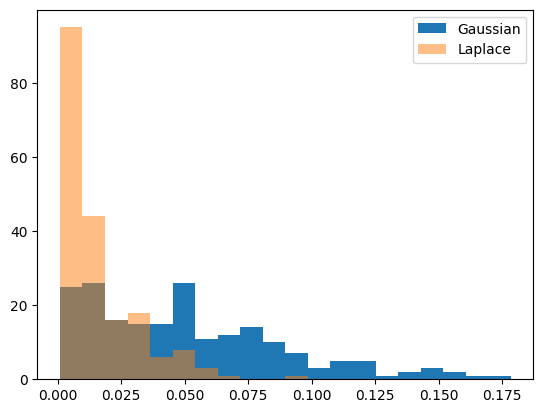

In [ ]:
true_answer = len(adult[adult['Age'] > 50])

laplace_answers = [laplace_mech(true_answer, 1, 1) for _ in range(200)]
gaussian_answers = [gaussian_mech(true_answer, 1, 1, 10e-5) for _ in range(200)]

laplace_error = [pct_error(true_answer, a) for a in laplace_answers]
gaussian_error = [pct_error(true_answer, a) for a in gaussian_answers]

_, bins, _ = plt.hist(gaussian_error, bins=20, label='Gaussian')
plt.hist(laplace_error, bins=bins, label='Laplace', alpha=0.5)
plt.legend()

YOUR ANSWER HERE
Como podemos ver, para la consulta de saber cuántos adultos mayores a 50 con un presupuesto de privacidad $\epsilon$ igual a 1 y un $\delta$ de 0.00001, la dispersión de los errores del mecanismo Gaussiano es mayor que la dispersión de los errores del meceanismo de laplace (la desviación estándar). Además, podemos ver que la cantidad de datos en el caso del mecanismo de Laplace se acumulan en torno a cero, lo que quiere decir que tiene menor error (haciendo 200 consultas sobre la cantidad de personas mayores a 50 años) en promedio. 

## Question 2 (4 points)

The function `age_cdf` calculates the cumulative distribution function (CDF) of the ages in the adult dataset, expressed as a vector of counts.

What is the **L1 global sensitivity** of `age_cdf`? Justify your answer using the definition of the L1 norm, and the sensitivity of vectors.

Length of CDF vector: 100


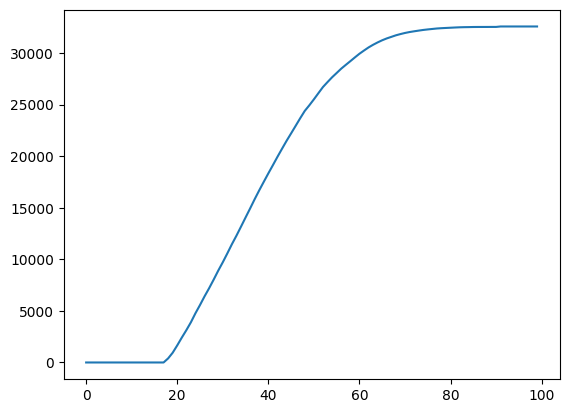

In [5]:
def age_cdf():
    a = adult['Age']
    return [len(a[a < i]) for i in range(100)]

plt.plot(age_cdf());
print('Length of CDF vector:', len(age_cdf()))

La sensibilidad L1 de la función `age_cdf` se refiere al cambio máximo (en norma L1) en la salida de la función cuando se modifica una sola fila del conjunto de datos (es decir, entre bases de datos vecinas).

En este caso, la función devuelve un vector con la cantidad de personas con edad menor que cada valor $ i $ en el rango de 0 a 99:

$$
\text{age cdf}(x) = \left[ \#\{a \in x \mid a < i\} \right]_{i=0}^{99}
$$

El **peor caso** ocurre cuando se agrega una persona con edad 0, ya que esta persona afectará todas las componentes $ i $ para $ i = 1, 2, \dots, 99 $, pero no $ i = 0 $ porque $ 0 < 0 $ es falso.

Entonces, la diferencia entre dos bases vecinas $ x $ y $ x' $, donde solo difieren por esta persona con edad 0, será:

$$
\text{age cdf}(x') - \text{{age cdf}}(x) = (0, 1, 1, \dots, 1) \in \mathbb{R}^{100}
$$

Y su norma L1 será:

$$
GS_{L1}(\text{age cdf}) = \max_{x,x'} \| \text{age cdf}(x) - \text{age cdf}(x') \|_1 \quad \text{tal que } d(x,x') \leq 1
$$

$$
GS_{L1}(\text{age cdf}) = \sum_{i=1}^{99} |1| = 99
$$

Por lo tanto, la **sensibilidad global L1** de la función `age_cdf` es:

$$
GS_{L1}(\text{age cdf}) = 99
$$


## Question 3 (4 points)

- What is the **L2 global sensitivity** of `age_cdf`? Justify your answer using the definition of the L2 norm, and the sensitivity of vectors.
- How does the L2 global sensitivity compares to the L1 norm sensitivity of `age_cdf`?


La **sensibilidad L2** mide el cambio máximo en la salida de la función utilizando la distancia euclidiana (norma L2). Es decir, la raíz cuadrada de la suma de los cuadrados de las diferencias.

La función `age_cdf` calcula el número de personas con edad menor que cada valor $i$. Cuando agregamos una persona con edad 0, el vector de diferencias entre dos bases vecinas $x$ y $x'$ será:

$$
\text{age cdf}(x') - \text{age cdf}(x) = (0, 1, 1, \dots, 1) \in \mathbb{R}^{100}
$$

La norma L2 de esta diferencia es:

$$
GS_{L2}(\text{age cdf}) = \max_{x,x'} \| \text{age cdf}(x) - \text{age cdf}(x') \|_2 \quad \text{tal que } d(x,x') \leq 1
$$

La fórmula de la norma L2 es la raíz cuadrada de la suma de los cuadrados de las diferencias. Aplicando esta fórmula:

$$
\| (0, 1, 1, \dots, 1) \|_2 = \sqrt{0^2 + 1^2 + 1^2 + \cdots + 1^2}
$$

Este vector tiene **99 elementos 1**, por lo que el cálculo se simplifica a:

$$
\| (0, 1, 1, \dots, 1) \|_2 = \sqrt{1^2 + 1^2 + \cdots + 1^2} = \sqrt{99}
$$

Por lo tanto, la **sensibilidad L2** es:

$$
GS_{L2}(\text{age cdf}) = \sqrt{99} \approx 9.95
$$

Esto significa que el cambio máximo en la salida de la función, en términos de la distancia euclidiana, será igual a $ \sqrt{99} $. Podemo decir entonces, que la sensibilidad global L1 es el cuadrado de la sensibilidad global L2, es decir, $GS_{L1}(\text{age cdf}) = (GS_{L2}(\text{age cdf}))^2$ (La primera L1 es mayor que la segunda L2, cerca de 10 veces la segunda).


## Range Queries

A *range query* counts the number of rows in the dataset which have a value lying in a given range. For example, "how many participants are between the ages of 21 and 33?" is a range query. A *workload* of range queries is just a list of range queries. The code below generates 100 random range queries over ages in the adult dataset.

In [6]:
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

random_lower_bounds = [random.randint(1, 70) for _ in range(100)]
random_workload = [(lb, random.randint(lb, 100)) for lb in random_lower_bounds]
real_answers = [range_query(adult, 'Age', lb, ub) for (lb, ub) in random_workload]

print('First 5 queries: ', random_workload[:5])

First 5 queries:  [(27, 60), (3, 18), (64, 92), (14, 21), (41, 57)]


## Question 4 (4 points)

Write code to answer a workload of range queries using `laplace_mech` and sequential composition. Your solution should have a **total privacy cost of epsilon**.

In [18]:
def workload_laplace(workload, epsilon):
    n = len(workload)
    #Aseguramos que la consulta total tenga un costo de privacidad de epsilon, 
    #dividiendo el presupuesto entre la cantidad de consultas por rango.
    noisy_answers = []
    #Ahora, para todos los pares
    for (lower_bound, upper_bound) in workload:
        true_answer = range_query(adult, 'Age', lower_bound, upper_bound)
        sensitivity = 1
        epsilon_per_query = epsilon / n
        #creamos el ruido de laplace 
        noisy_answer = laplace_mech(true_answer, sensitivity, epsilon_per_query)
        
        noisy_answers.append(noisy_answer)
    return noisy_answers


print('First 4 answers:', workload_laplace(random_workload, 1.0)[:4])

First 4 answers: [22752.21879088963, 464.0884166539093, 1594.038108496416, 2309.143507046006]


In [19]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, workload_laplace(random_workload, 1.0))]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 50
assert np.mean(errors) < 200

Average absolute error: 102.07237030572938


## Question 5 (8 points)

Write code to answer a workload using `laplace_mech`. Your solution should *not* use sequential composition, and should have a total privacy cost of `epsilon`, justified by the vector-valued Laplace mechanism.

*Hint*: remember to use L1 global sensitivity.

In [21]:
def workload_laplace_vec(workload, epsilon):
    """Recordemos que el vector-valued Laplace mechanism tiene
    scale factor de GS_L1(f) / epsilon. Por lo tanto, dado que 
    en nuestro caso la sensibilidad es 1 por cada consulta del 
    vector, podemos decir que la sensibilidad total o global será
    el número de tuplas con sensibilidad 1 cada una, osea, igual
    al largo de workload. Por lo tanto, scale = k / epsilon. 
    La diferencia con el workload normal es que éste aplica la 
    misma función de laplace sobre todas las respuestas."""
    k = len(workload)
    delta_l1 = k
    scale = delta_l1 / epsilon
    answers = []

    for (lower_bound, upper_bound) in workload:
        true_answer = range_query(adult, 'Age', lower_bound, upper_bound)
        answers.append(true_answer)

    #ahora se aplica el mismo mecanismo, con el mismo scale factor
    noisy_answers = [ans + np.random.laplace(0, scale) for ans in answers]
    return noisy_answers

print('First 4 answers:', workload_laplace_vec(random_workload, 1.0)[:4])

First 4 answers: [22811.06206906758, 374.79889075961205, 1559.0515471744532, 2493.9305774965496]


In [22]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, workload_laplace_vec(random_workload, 1.0))]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 50
assert np.mean(errors) < 200

Average absolute error: 90.97849605242637


## Question 6 (4 points)

In 2-5 sentences, answer the following:
- Did the two solutions differ in terms of their accuracy?
- How do they differ in terms of their use of composition properties of differential privacy?

YOUR ANSWER HERE. 
1. Podemos ver que las vector-valued Laplace mechanism tiene un Average Absolute Error menor que el del Laplace mechanism clásico (90 con respecto a 102), por lo que podemos decir que es más preciso que aquel. 
2. Además, el mecanismo clásico trata cada consulta como una entidad independiente, lo que es útil cuando las consultas son dispersas o se realizan en distintos momentos. Mientras que el mecanismo vectorial ve todo como una pregunta conjunta sobre la base de datos, y por eso puede "gastar" privacidad de manera más eficiente cuando se responde todo junto. El mecanismo clásico tiene composición secuencial, dividiendo el presupuesto entre la cantidad de consultas totales, mientras que el mecanismo de laplace vector-valued tiene composición de tipo simultánea.

## Question 7 (8 points)

Write code to answer a workload using `gaussian_mech_vec` - the version of the Gaussian mechanism for vector-valued queries. Your solution should not use sequential composition, should satisfy $(\epsilon, \delta)$-differential privacy, and should have a total privacy cost of (`epsilon`, `delta`).

*Hint*: remember to use L2 sensitivity.

In [ ]:
def workload_gaussian_vec(workload, epsilon, delta):
    n = len(workload)

    true_answers = np.array([range_query(adult, 'Age', lb, ub) for (lb, ub) in workload])

    l2_sensitivity = np.sqrt(n)

    return gaussian_mech(true_answers, l2_sensitivity, epsilon, delta)
    
print('First 4 answers:', workload_gaussian_vec(random_workload, 1.0, 1e-5)[:4])

First 4 answers: [22805.26321052   479.26321052  1628.26321052  2494.26321052]


In [30]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, workload_gaussian_vec(random_workload, 1.0, 1e-5))]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 10
assert np.mean(errors) < 100

Average absolute error: 35.16568645268944


## Question 8 (6 points)

In 2-5 sentences, answer the following:
- Of your solutions in questions (4,5,7), which ones rely on *sequential composition*?
- Which solution offers the best accuracy?
- Why does this particular solution yield the best accuracy?

YOUR ANSWER HERE
1. La única que usa composición secuencial es la workload_laplace, donde el costo total de privacidad se calcula como $n \cdot \frac{\epsilon}{n} = \epsilon$, mientras que workload_laplace_vec aplica el mecanismo vectorial de laplace mediante la sensibilidad $L_1 = n$ (agregando ruido a cada componente con un solo $\epsilon$ total), y por último la función workload_gaussian_vec aplica el mecanismo de Gauss con una sensibilidad de $L_2 = \sqrt {n}$ (donde el ruido gaussiano con una única combinación ($\epsilon$, $\delta$) para todo el vector.)

2. La solución que ofrece la mejor precisión es el mecanismo vectorial de Gauss, con un Average Absolute Error de 35 (en comparación con 90 y 52 del workload_laplace y workload_laplace_vec respectivamente).

3. El mecanismo de Gauss vectorial ofrece mejor precisión porque no divide $\epsilon$, usa una sensibilidad más favorable $L_2$ (que de hecho vimos en la primera parte que es menor que $L_1$) y principalmente porque agrega menos ruido total por coordenada. Porque cuanto más baja es la sensibilidad, menos ruido necesitamos agregar para proteger la privacidad con un mismo $\epsilon$.

## Question 9 (10 points)

Use advanced composition to achieve $(1, 10^{-5})$-DP using the laplace mechanism. Write code to calculate the $\epsilon_i$ for each iteration. Then, complete the function `workload_advcom_laplace` that receives the `epsilon_i` **for each iteration** (not the total epsilon).

_Hint_: You will have to calculate the $\epsilon_i$ for each iteration using the advanced composition theorem fixing $\delta' = 10^{-5}$ and $\epsilon' = 1$.

In [ ]:
# COMPLETE
delta_p = 1e-5
epsilon_p = 1
k = len(random_workload)

def eps_i():
    #epsilon_p = 2 * eps_i * np.sqrt(2 * k * np.log(1 / delta_p))
    eps_i = epsilon_p / (2 * np.sqrt(2 * k * np.log(1 / delta_p)))
    return  eps_i

# Encontramos ahora el valor de epsilon_i que satisface la composición.
# Al principio pensé que era un epsilon_i diferente para cada consulta, 
# pero en realidad no era así!
epsilon_i = eps_i()

print('epsilon for each iteration:', epsilon_i)

epsilon for each iteration: 0.010419866624665259


In [ ]:
def workload_advcomp_laplace(workload, epsilon_i):
    noisy_answers = []
    for (lower_bound, upper_bound) in workload:
        true_answer = range_query(adult, 'Age', lower_bound, upper_bound)
        noise = np.random.laplace(loc=0, scale= 1 / epsilon_i)
        noisy_answers.append(true_answer + noise)
    return noisy_answers

advcomp_answers = workload_advcomp_laplace(random_workload, epsilon_i)
print('First 4 answers:', advcomp_answers[:4])

First 4 answers: [22502.449816164946, 420.2058930880389, 1443.3432310116355, 1981.198610340353]


In [67]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, advcomp_answers)]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 50
assert np.mean(errors) < 200

Average absolute error: 98.75723279877153


## Question 10 (6 points)

In 2-5 sentences, answer the following:
- How does this solution compare to the result of question 4 (workload_laplace)? Explain in terms of the used epsilons and the concepts seen in class.
- With $\delta'$ fixed in $10^{-5}$, what property of the workload (seen in class) favors the more accurate solution?
- What could we expect if the workload had 50 queries?

YOUR ANSWER HERE

En comparación con la solución de la pregunta 4, que usa composición secuencial, esta solución aplica composición avanzada, lo que permite distribuir el presupuesto de privacidad de forma más eficiente. Aunque cada consulta usa el mismo $\epsilon_i$, este valor fue calculado para que el total cumpla ($\epsilon ', \delta '=10^{-5}$), lo que permite agregar menos ruido por consulta y lograr mayor precisión. 

La independencia entre consultas (propiedad del workload) favorece esta mejora en precisión, ya que reduce la sensibilidad conjunta. 

Si el workload tuviera solo 50 consultas y para el mismo $\epsilon'$, esperaríamos mayor precisión aún, ya que el $\epsilon_i$ por consulta sería mayor y (al aumentar $k$), por ende, el ruido agregado sería menor. Lo cual tiene sentido, porque es de esperar que a menor cantidad de consultas, menor cantidad de ruido, y viceversa. 
$$
\epsilon' =  2\epsilon_i \sqrt{2k \ln(1/\delta')} 
$$